In [1]:
# import nedded libraries
import pandas as pd
import numpy as np
#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
### Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard 
### Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine
### Learning Repository1):

### 1. CRIM: per capita crime rate by town.
### 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
### 3. INDUS: proportion of non-retail business acres per town
### 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### 5. NOX: nitric oxides concentration (parts per 10 million) 1https://archive.ics.uci.edu/ml/datasets/Housing 
                ## 123 20.2. Load the Dataset 124 
### 6. RM: average number of rooms per dwelling 
### 7. AGE: proportion of owner-occupied units built prior to 1940 
### 8. DIS: weighted distances to ﬁve Boston employment centers 
### 9. RAD: index of accessibility to radial highways 
### 10.TAX: full-value property-tax rate per $10,000 
### 11.PTRATIO: pupil-teacher ratio by town 
### 12.B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
### 13.LSTAT: % lower status of the population 
### 14.MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of 
###     units.

In [5]:
# data describtion

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'C:\Users\Amr.Abdelfattah\machine-learning-course\housing.csv', delim_whitespace=True, names=names)
display(df.head())
display(df.info())
display(df.describe())
display(df.columns)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

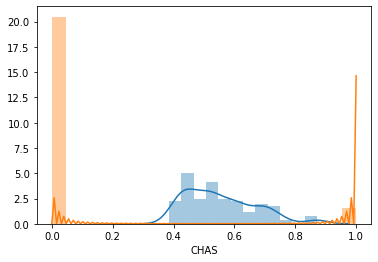

In [20]:
sns.distplot(df['NOX'])
sns.distplot(df['CHAS'])


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

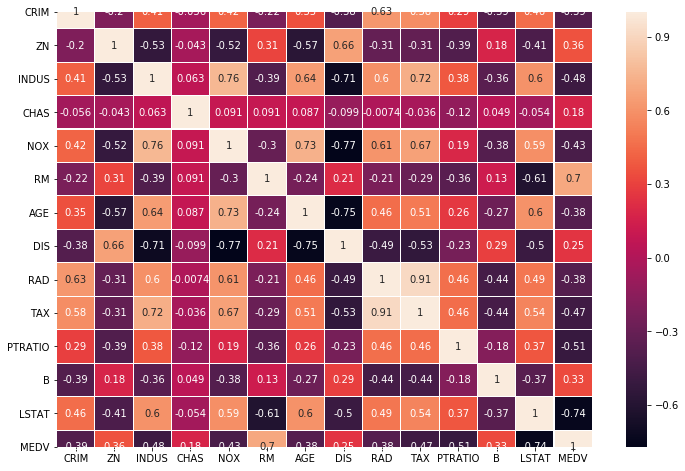

In [13]:
# df.replace(-9999.000000, np.nan, inplace=True)
display(df.isna().sum())
df.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.1)

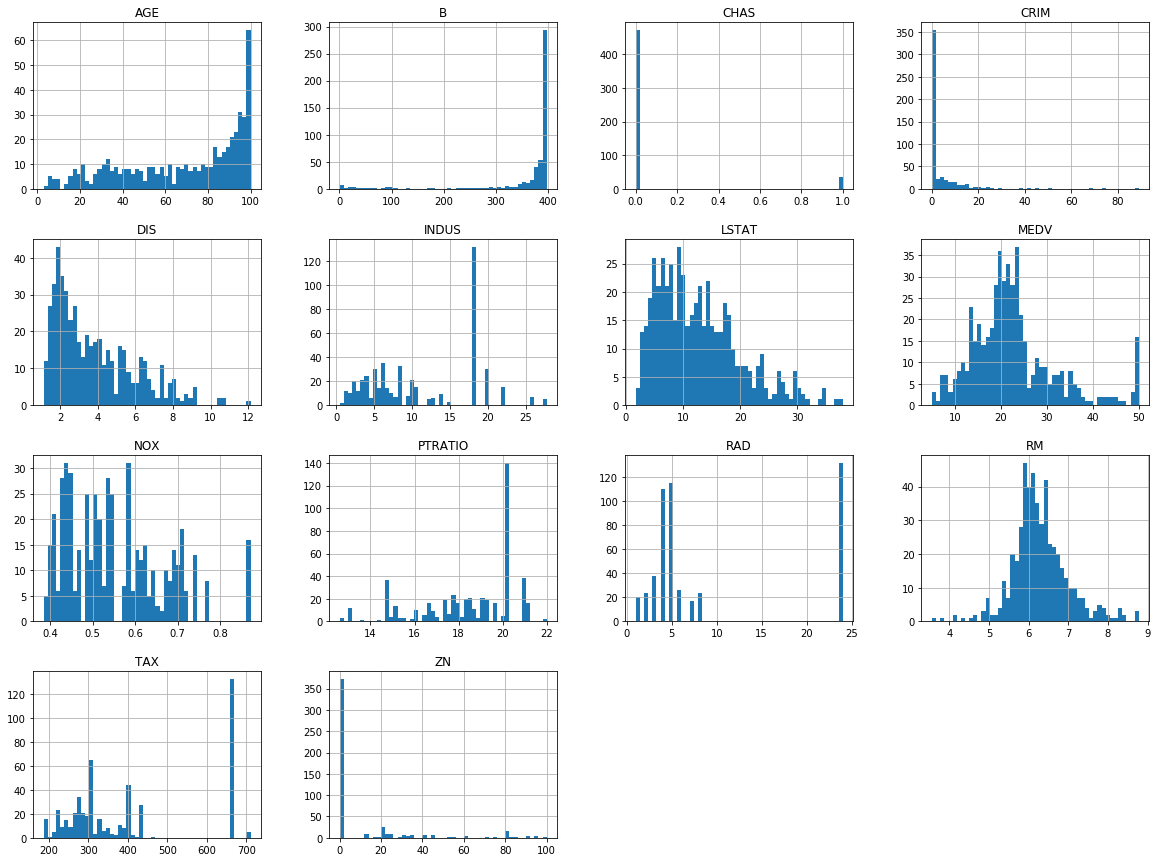

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

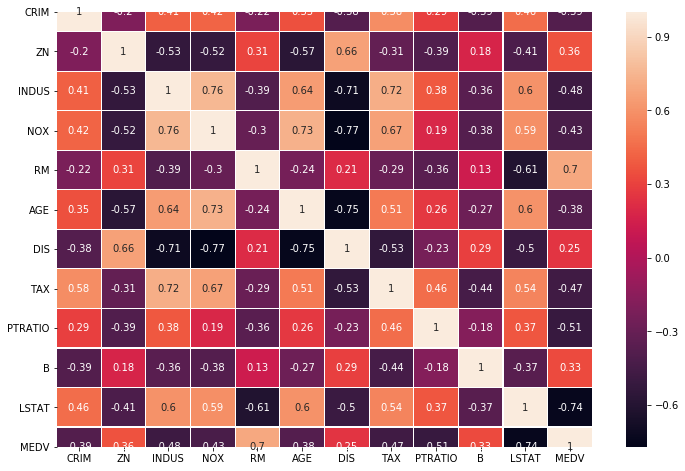

In [27]:
df_new = df.drop(columns = ['RAD', 'CHAS'],axis=1)
df_new
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,ax=ax,linewidths=0.1)

In [28]:
df_new.corr()

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
ZN      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
INDUS    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
NOX      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
RM      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
AGE      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
DIS     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
TAX      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
PTRATIO  0.289946 -0.391679  0.383248  0.188933 -0.355501  0.261515 -0.232471   
B       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
LSTAT    0.455621 -0.412995  0.603800  0.590879 -0.613808  0.602339 -0.496996   
MEDV    -0.388305  0.360445 -0.483725 -0.427321  0.695360 -0.376955  0.249929   

              TAX   PTRATIO         B     LSTAT      MEDV  
CRIM     0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN      -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS    0.720760  0.383248 -0.356977  0.603800 -0.483725  
NOX      0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM      -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE      0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS     -0.534432 -0.232471  0.291512 -0.496996  0.249929  
TAX      1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B       -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT    0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV    -0.468536 -0.507787  0.333461 -0.737663  1.000000

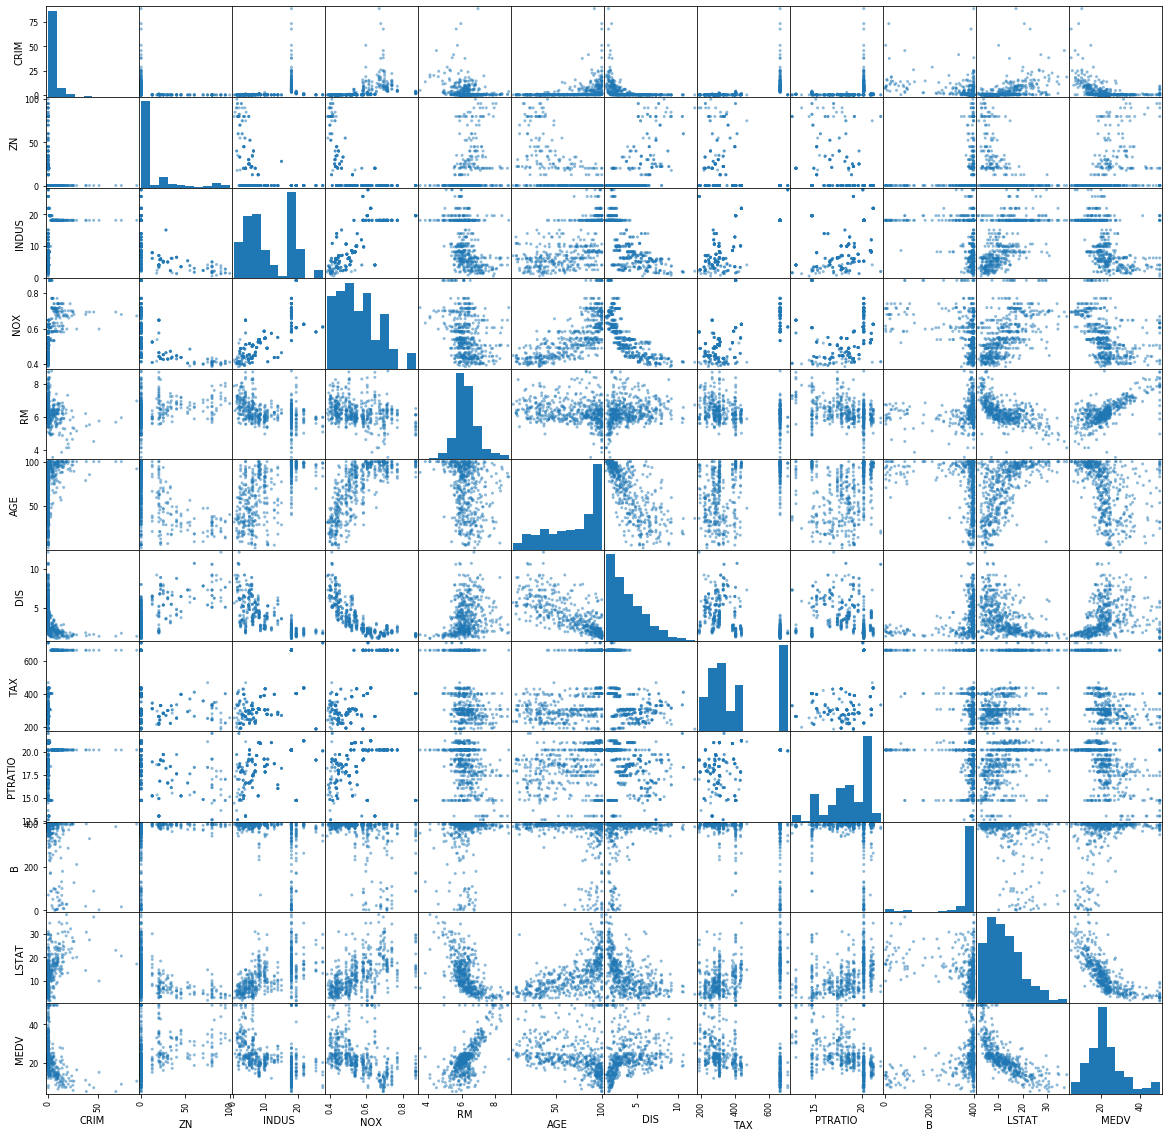

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_new, figsize=(20, 20))
plt.show()

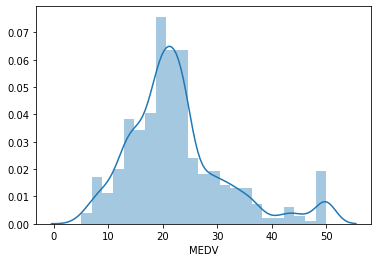

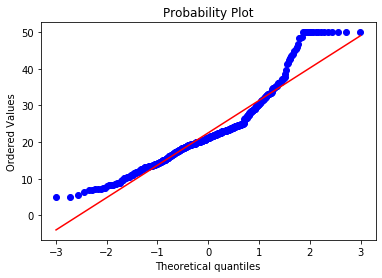

In [40]:
from scipy import stats
sns.distplot(df_new['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(df_new['MEDV'], plot=plt)

In [32]:
# feature scaling and model training
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
X = df_new.loc[:,df_new.columns!=' MEDV'] # features
Y = df_new['MEDV'] # label
X = min_max_scaler.fit_transform(X)
linear_reg = LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
linear_reg.fit(xtrain,ytrain)
preds=linear_reg.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

model rmse =  2.1156940120809802e-28


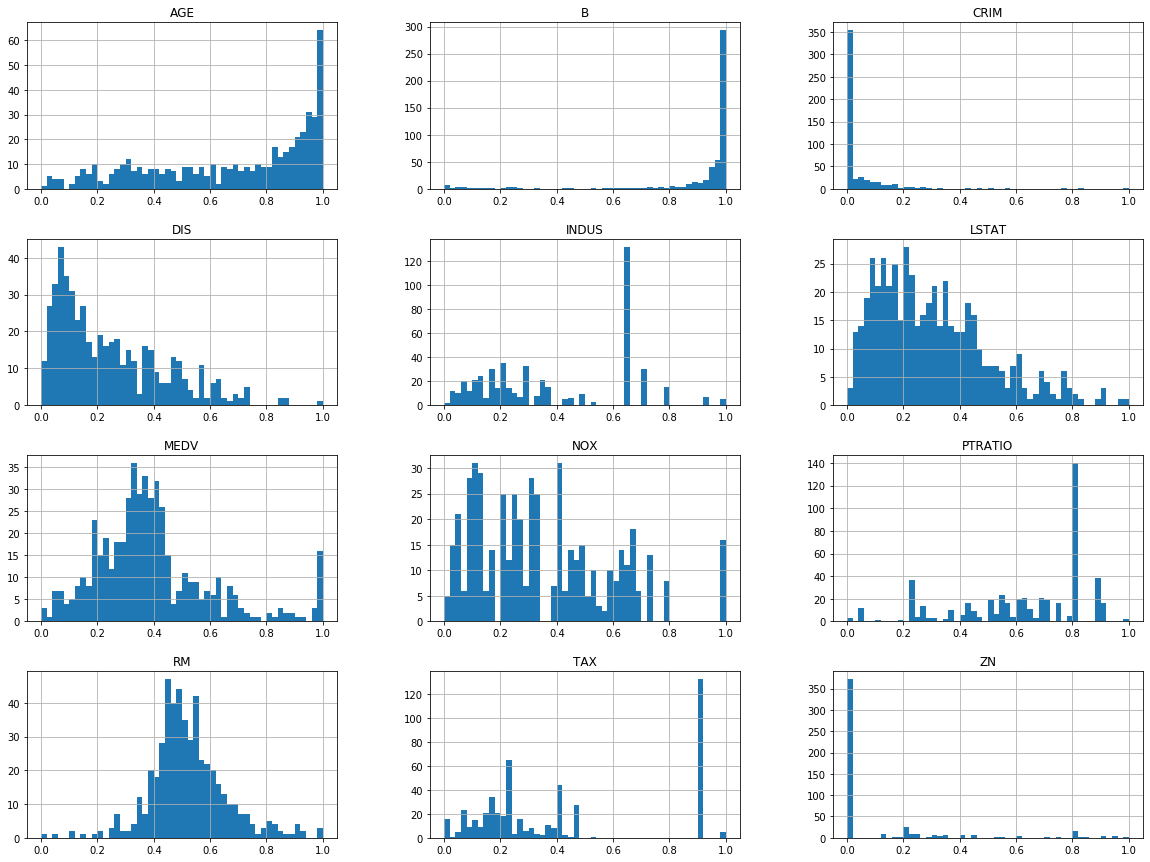

In [33]:
Xdf = pd.DataFrame(X,columns= ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])
Xdf.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
# test model with cross validation
# visualize rmse scores 
import plotly.graph_objects as go
scores = cross_val_score(linear_reg, X , Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = -scores
fig = go.Figure(
    data=[go.Bar(x=[i for i in range(7)],y=list(rmse_scores)[2:10])],
    layout_title_text="cv versus model error")
fig.show()